# About: Deep Learning '23 Assignment 1


We will perform Image Classification task on the MNIST dataset which has 70,000 28*28 images labelled into 10 classes. 

**Total Marks: 60**


**Fill these**

Name: `Boorgu Shashank Goud`

Roll Number: `20CS30013`

**Instructions:**

1. We have left code cells blank for you to fill up with appropriate code. Do not add any extra code cells. Strictly follow the format and fill up the cells with the correct code. Refer to cell comments for what to fill in that cell.

2. *Do not* use any training frameworks like PyTorch Lightning. This assignment will test your ability to write custom training loops.

3. Save the notebook with cell outputs of all cells. The cell outputs  will be used for evaluating your submission.




In [176]:
import torch
import torch.nn as nn
import random
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import random_split, DataLoader

## Add any other imports here

In [177]:
SEED=42
torch.manual_seed(SEED)
random.seed(SEED)
np.random.seed(SEED)

## Getting the data

In [178]:
train_data = datasets.MNIST('data', train=True, download=True, transform=transforms.ToTensor())
test_data = datasets.MNIST('data', train=False, download=True, transform=transforms.ToTensor())
train, val = random_split(train_data, [50000, 10000], generator=torch.Generator().manual_seed(SEED))

train_loader = DataLoader(train, batch_size=64, shuffle=True)
val_loader = DataLoader(val, batch_size=64, shuffle=False)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

print(len(train), len(val), len(test_data))

50000 10000 10000


## Defining the Model [18 marks]

You will define 3 models, with 2, 3, 4 hidden layers respectively. Lets call these models A, B, C. We will be studying the comparitive performance of these 3 models on this task.

Use ReLU as the activation function for all three models. Later we will experiment with other activation functions as well.

### Model A

Architecture:

1. Input Layer 
2. Hidden Layer (Dimension Size - 64)
3. Activation Function
4. Hidden Layer (Dimension Size - 128)
5. Activation Function
6. Output Layer (Dimension Size = Number of Classes = 10)

In [179]:
# Model A Definition 
# Fill in appropriately while maintaining the name of the variable
##### modelA = ...
class A(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(A, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.act1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.act2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.act1(out)
        out = self.fc2(out)
        out = self.act2(out)
        out = self.fc3(out)
        return out
modelA = A(input_size=784, hidden_size1=64, hidden_size2=128, num_classes=10)


### Model B


Architecture:

1. Input Layer 
2. Hidden Layer (Dimension Size - 64)
3. Activation Function
4. Hidden Layer (Dimension Size - 128)
5. Activation Function
6. Hidden Layer (Dimension Size - 256)
7. Activation Function
8. Output Layer (Dimension Size = Number of Classes = 10)

In [180]:
# Model B Definiton



# Use the same variable name
#### modelB = ... 
class B(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, num_classes):
        super(B, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.act1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.act2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        self.act3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_size3, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.act1(out)
        out = self.fc2(out)
        out = self.act2(out)
        out = self.fc3(out)
        out = self.act3(out)
        out = self.fc4(out)
        return out

modelB = B(input_size=784, hidden_size1=64, hidden_size2=128, hidden_size3=256, num_classes=10)


### Model C


Architecture

1. Input Layer 
2. Hidden Layer (Dimension Size - 64)
3. Activation Function
4. Hidden Layer (Dimension Size - 128)
5. Activation Function
6. Hidden Layer (Dimension Size - 256)
7. Activation Function
8. Hidden Layer (Dimension Size - 512)
9. Activation Function
10. Output Layer (Dimension Size = Number of Classes = 10)

In [181]:
# Model C Definition


# Use the same variable name
##### modelC = ...
class C(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, hidden_size4, num_classes):
        super(C, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.act1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.act2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        self.act3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_size3, hidden_size4)
        self.act4 = nn.ReLU()
        self.fc5 = nn.Linear(hidden_size4, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.act1(out)
        out = self.fc2(out)
        out = self.act2(out)
        out = self.fc3(out)
        out = self.act3(out)
        out = self.fc4(out)
        out = self.act4(out)
        out = self.fc5(out)
        return out
  
modelC = C(input_size=784, hidden_size1=64, hidden_size2=128, hidden_size3=256, hidden_size4=512, num_classes=10)


## Loss Function & Optimizer [2 marks]

* Loss Function: Cross Entropy Loss
* Optimizer : Adam

Use PyTorch Library versions for these two.

In [182]:
# Use the same variable names
criterion = nn.CrossEntropyLoss()
optimizerA = torch.optim.Adam(modelA.parameters(), lr=0.001)
optimizerB = torch.optim.Adam(modelB.parameters(), lr=0.001)
optimizerC = torch.optim.Adam(modelC.parameters(), lr=0.001)

## Training Loop [30 marks]

We give you the freedom to choose Hyperparameters like learing rate, number of epochs etc, but take care to use the **same** hyperparameters for all the 3 models. Also clearly state the hyperparameters you have chosen

For each model, You need to report these metrics: Training Loss, Validating Loss, Training Accuracyuracy, Validation Accuracyuracy at the end of each epoch.

Also plot the graphs of the following (in separate cells)
1. Training Loss & Validating Loss V/s Epoch
2. Training Accuracyuracy & Validation Accuracyuracy V/s Epoch

In [183]:
# Define the hyperparameters (same for all 3 models) here
num_epochs = 5
learning_rate = 0.001

### Model A 



In [184]:
# Training Loop for model D
train_loss_data = []
val_loss_data = []
train_acc_data = []
val_acc_data = []
total_step = len(train_loader)
for epoch in range(num_epochs):
    train_loss = 0.0
    train_total = 0
    train_correct = 0
    val_loss = 0.0
    val_total = 0
    val_correct = 0
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        outputs = modelA(images.reshape(-1, 28*28))
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizerA.zero_grad()
        loss.backward()
        optimizerA.step()

        # Track training loss and accuracy
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

        # Print training metrics
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, total_step, loss.item()))
        # Evaluate network on validation set and track metrics
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = modelA(images.reshape(-1, 28*28))
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

  # Record metrics
    train_loss_data.append(train_loss / len(train_loader))
    val_loss_data.append(val_loss / len(val_loader))
    train_acc_data.append(100 * train_correct / train_total)
    val_acc_data.append(100 * val_correct / val_total)

# Print validation metrics
    print('Epoch [{}/{}], Training Loss: {:.4f}, Validating Loss: {:.4f}, Training Accuracy: {:.2f}%, Validation Accuracy: {:.2f}%'
          .format(epoch+1, num_epochs, train_loss_data[-1], val_loss_data[-1], train_acc_data[-1], val_acc_data[-1]))
            
A_val_accuracy = val_acc_data[-1]

Epoch [1/5], Step [100/782], Loss: 0.4177
Epoch [1/5], Step [200/782], Loss: 0.5983
Epoch [1/5], Step [300/782], Loss: 0.4087
Epoch [1/5], Step [400/782], Loss: 0.2868
Epoch [1/5], Step [500/782], Loss: 0.2096
Epoch [1/5], Step [600/782], Loss: 0.2005
Epoch [1/5], Step [700/782], Loss: 0.1385
Epoch [1/5], Train Loss: 0.3942, Val Loss: 0.2394, Train Acc: 88.92%, Val Acc: 93.12%
Epoch [2/5], Step [100/782], Loss: 0.1709
Epoch [2/5], Step [200/782], Loss: 0.2155
Epoch [2/5], Step [300/782], Loss: 0.2398
Epoch [2/5], Step [400/782], Loss: 0.1007
Epoch [2/5], Step [500/782], Loss: 0.0753
Epoch [2/5], Step [600/782], Loss: 0.1531
Epoch [2/5], Step [700/782], Loss: 0.3551
Epoch [2/5], Train Loss: 0.1821, Val Loss: 0.1700, Train Acc: 94.68%, Val Acc: 94.99%
Epoch [3/5], Step [100/782], Loss: 0.1312
Epoch [3/5], Step [200/782], Loss: 0.0527
Epoch [3/5], Step [300/782], Loss: 0.0339
Epoch [3/5], Step [400/782], Loss: 0.0867
Epoch [3/5], Step [500/782], Loss: 0.0168
Epoch [3/5], Step [600/782], L

In [185]:
# Plot Graph of Train & Validating Loss vs Epoch (together in same plot) for model A
plt.plot(range(1, len(train_loss_data)+1),train_loss_data, label='Training Loss')
plt.plot(range(1, len(val_loss_data)+1),val_loss_data, label='Validating Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [186]:
# Plot Graph of Train & Validation Accuracyuracy vs Epoch (together in same plot) for model A
plt.plot(range(1, len(train_acc_data)+1),train_acc_data, label='Training Accuracy')
plt.plot(range(1, len(val_acc_data)+1),val_acc_data, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Model B


In [187]:
# Training Loop for model B
train_loss_data = []
val_loss_data = []
train_acc_data = []
val_acc_data = []
total_step = len(train_loader)
for epoch in range(num_epochs):
    train_loss = 0.0
    train_total = 0
    train_correct = 0
    val_loss = 0.0
    val_total = 0
    val_correct = 0
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        outputs = modelB(images.reshape(-1, 28*28))
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizerB.zero_grad()
        loss.backward()
        optimizerB.step()

        # Track training loss and accuracy
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

        # Print training metrics
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, total_step, loss.item()))
        # Evaluate network on validation set and track metrics
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = modelB(images.reshape(-1, 28*28))
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

  # Record metrics
    train_loss_data.append(train_loss / len(train_loader))
    val_loss_data.append(val_loss / len(val_loader))
    train_acc_data.append(100 * train_correct / train_total)
    val_acc_data.append(100 * val_correct / val_total)

# Print validation metrics
    print('Epoch [{}/{}], Training Loss: {:.4f}, Validating Loss: {:.4f}, Training Accuracy: {:.2f}%, Validation Accuracy: {:.2f}%'
          .format(epoch+1, num_epochs, train_loss_data[-1], val_loss_data[-1], train_acc_data[-1], val_acc_data[-1]))
            

B_val_accuracy = val_acc_data[-1]

Epoch [1/5], Step [100/782], Loss: 0.3214
Epoch [1/5], Step [200/782], Loss: 0.4289
Epoch [1/5], Step [300/782], Loss: 0.1709
Epoch [1/5], Step [400/782], Loss: 0.4262
Epoch [1/5], Step [500/782], Loss: 0.3117
Epoch [1/5], Step [600/782], Loss: 0.1903
Epoch [1/5], Step [700/782], Loss: 0.2529
Epoch [1/5], Train Loss: 0.3606, Val Loss: 0.1835, Train Acc: 89.12%, Val Acc: 94.49%
Epoch [2/5], Step [100/782], Loss: 0.1643
Epoch [2/5], Step [200/782], Loss: 0.1702
Epoch [2/5], Step [300/782], Loss: 0.2687
Epoch [2/5], Step [400/782], Loss: 0.0668
Epoch [2/5], Step [500/782], Loss: 0.0290
Epoch [2/5], Step [600/782], Loss: 0.0854
Epoch [2/5], Step [700/782], Loss: 0.1091
Epoch [2/5], Train Loss: 0.1498, Val Loss: 0.1490, Train Acc: 95.49%, Val Acc: 95.47%
Epoch [3/5], Step [100/782], Loss: 0.1430
Epoch [3/5], Step [200/782], Loss: 0.2823
Epoch [3/5], Step [300/782], Loss: 0.0382
Epoch [3/5], Step [400/782], Loss: 0.0682
Epoch [3/5], Step [500/782], Loss: 0.4091
Epoch [3/5], Step [600/782], L

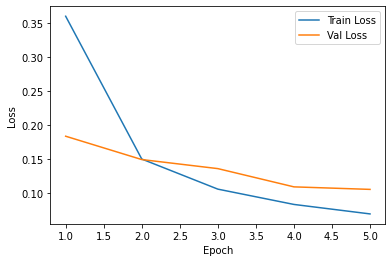

In [188]:
# Plot Graph of Train & Validating Loss vs Epoch (together in same plot) for model B
plt.plot(range(1, len(train_loss_data)+1),train_loss_data, label='Training Loss')
plt.plot(range(1, len(val_loss_data)+1),val_loss_data, label='Validating Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

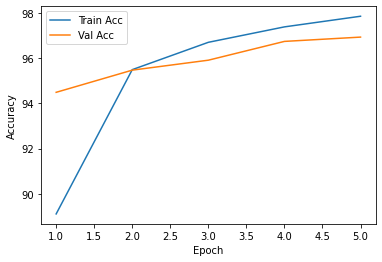

In [189]:
# Plot Graph of Train & Validation Accuracyuracy vs Epoch (together in same plot) for model B
plt.plot(range(1, len(train_acc_data)+1),train_acc_data, label='Training Accuracy')
plt.plot(range(1, len(val_acc_data)+1),val_acc_data, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Model C


In [190]:
# Training Loop for model C
# Training Loop for model C
train_loss_data = []
val_loss_data = []
train_acc_data = []
val_acc_data = []
total_step = len(train_loader)
for epoch in range(num_epochs):
    train_loss = 0.0
    train_total = 0
    train_correct = 0
    val_loss = 0.0
    val_total = 0
    val_correct = 0
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        outputs = modelC(images.reshape(-1, 28*28))
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizerC.zero_grad()
        loss.backward()
        optimizerC.step()

        # Track training loss and accuracy
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

        # Print training metrics
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, total_step, loss.item()))
        # Evaluate network on validation set and track metrics
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = modelC(images.reshape(-1, 28*28))
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

  # Record metrics
    train_loss_data.append(train_loss / len(train_loader))
    val_loss_data.append(val_loss / len(val_loader))
    train_acc_data.append(100 * train_correct / train_total)
    val_acc_data.append(100 * val_correct / val_total)

# Print validation metrics
    print('Epoch [{}/{}], Training Loss: {:.4f}, Validating Loss: {:.4f}, Training Accuracy: {:.2f}%, Validation Accuracy: {:.2f}%'
          .format(epoch+1, num_epochs, train_loss_data[-1], val_loss_data[-1], train_acc_data[-1], val_acc_data[-1]))
            
C_val_accuracy = val_acc_data[-1]

Epoch [1/5], Step [100/782], Loss: 0.2588
Epoch [1/5], Step [200/782], Loss: 0.3303
Epoch [1/5], Step [300/782], Loss: 0.2202
Epoch [1/5], Step [400/782], Loss: 0.2539
Epoch [1/5], Step [500/782], Loss: 0.1333
Epoch [1/5], Step [600/782], Loss: 0.1136
Epoch [1/5], Step [700/782], Loss: 0.0814
Epoch [1/5], Train Loss: 0.3434, Val Loss: 0.1731, Train Acc: 89.48%, Val Acc: 94.79%
Epoch [2/5], Step [100/782], Loss: 0.0198
Epoch [2/5], Step [200/782], Loss: 0.1837
Epoch [2/5], Step [300/782], Loss: 0.1864
Epoch [2/5], Step [400/782], Loss: 0.1374
Epoch [2/5], Step [500/782], Loss: 0.1219
Epoch [2/5], Step [600/782], Loss: 0.0921
Epoch [2/5], Step [700/782], Loss: 0.1211
Epoch [2/5], Train Loss: 0.1417, Val Loss: 0.1360, Train Acc: 95.75%, Val Acc: 96.03%
Epoch [3/5], Step [100/782], Loss: 0.0632
Epoch [3/5], Step [200/782], Loss: 0.0977
Epoch [3/5], Step [300/782], Loss: 0.1047
Epoch [3/5], Step [400/782], Loss: 0.0579
Epoch [3/5], Step [500/782], Loss: 0.2611
Epoch [3/5], Step [600/782], L

In [191]:
# Plot Graph of Train & Validating Loss vs Epoch (together in same plot) for model C
plt.plot(range(1, len(train_loss_data)+1),train_loss_data, label='Training Loss')
plt.plot(range(1, len(val_loss_data)+1),val_loss_data, label='Validating Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

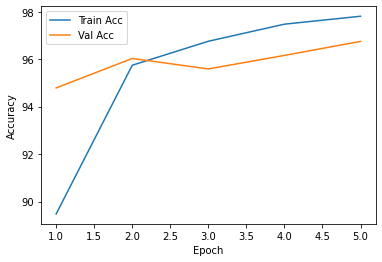

In [192]:
# Plot Graph of Train & Validation Accuracyuracy vs Epoch (together in same plot) for model C
plt.plot(range(1, len(train_acc_data)+1),train_acc_data, label='Training Accuracy')
plt.plot(range(1, len(val_acc_data)+1),val_acc_data, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Choosing a Activation Function [10 marks]

Based on the best performing model you found above, define 2 more models with these 2 activation functions (1 activation function is used throughout the model definiation). Use these Activation funcitons 


*   Tanh
*   LeakyRELU

In [193]:
#Best Model selection from A,B,C
max_val = max(max(A_val_accuracy,B_val_accuracy),C_val_accuracy)
if(max_val==A_val_accuracy):
   best_model = modelA
if(max_val==B_val_accuracy):
   best_model = modelB
if(max_val==C_val_accuracy):
   best_model = modelC

# Leaky ReLU model definiton
class ModelD(nn.Module):
    def __init__(self):
        super(ModelD, self).__init__()
        self.fc1 = nn.Linear(784, 64)
        self.fc2 = nn.Linear(64, 128)
        self.fc3 = nn.Linear(128, 256)
        self.fc4 = nn.Linear(256, 512)
        self.fc5 = nn.Linear(512, 10)
        self.lrelu = nn.LeakyReLU()
        
    def forward(self, x):
        x = x.view(-1, 784)
        x = self.lrelu(self.fc1(x))
        x = self.lrelu(self.fc2(x))
        x = self.lrelu(self.fc3(x))
        x = self.lrelu(self.fc4(x))
        x = self.fc5(x)
        return x
# Tanh model definition
class ModelE(nn.Module):
    def __init__(self):
        super(ModelE, self).__init__()
        self.fc1 = nn.Linear(784, 64)
        self.fc2 = nn.Linear(64, 128)
        self.fc3 = nn.Linear(128, 256)
        self.fc4 = nn.Linear(256, 512)
        self.fc5 = nn.Linear(512, 10)
        self.tanh = nn.Tanh()
        
    def forward(self, x):
        x = x.view(-1, 784)
        x = self.tanh(self.fc1(x))
        x = self.tanh(self.fc2(x))
        x = self.tanh(self.fc3(x))
        x = self.tanh(self.fc4(x))
        x = self.fc5(x)
        return x


# Maintain these variable names

model_lrelu = ModelD()
model_tanh = ModelE()
optimizerD = torch.optim.Adam(model_lrelu.parameters(), lr=0.001)
optimizerE = torch.optim.Adam(model_tanh.parameters(), lr=0.001)


### Training 

Train these two models with the same hyperparameters. Train in separate cells given below, and report the same metrics descrived previously (train_loss, val_loss, train_acc, val_acc)

In [194]:
# Training Loop for LRELU
# Training Loop for model D
train_loss_data = []
val_loss_data = []
train_acc_data = []
val_acc_data = []
total_step = len(train_loader)
for epoch in range(num_epochs):
    train_loss = 0.0
    train_total = 0
    train_correct = 0
    val_loss = 0.0
    val_total = 0
    val_correct = 0
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model_lrelu(images.reshape(-1, 28*28))
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizerD.zero_grad()
        loss.backward()
        optimizerD.step()

        # Track training loss and accuracy
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

        # Print training metrics
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, total_step, loss.item()))
        # Evaluate network on validation set and track metrics
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model_lrelu(images.reshape(-1, 28*28))
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

  # Record metrics
    train_loss_data.append(train_loss / len(train_loader))
    val_loss_data.append(val_loss / len(val_loader))
    train_acc_data.append(100 * train_correct / train_total)
    val_acc_data.append(100 * val_correct / val_total)

# Print validation metrics
    print('Epoch [{}/{}], Training Loss: {:.4f}, Validating Loss: {:.4f}, Training Accuracy: {:.2f}%, Validation Accuracy: {:.2f}%'
          .format(epoch+1, num_epochs, train_loss_data[-1], val_loss_data[-1], train_acc_data[-1], val_acc_data[-1]))
            
# Plot Graph of Train & Validating Loss vs Epoch (together in same plot) for model D
plt.plot(range(1, len(train_loss_data)+1),train_loss_data, label='Training Loss')
plt.plot(range(1, len(val_loss_data)+1),val_loss_data, label='Validating Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
# Plot Graph of Train & Validation Accuracyuracy vs Epoch (together in same plot) for model D
plt.plot(range(1, len(train_acc_data)+1),train_acc_data, label='Training Accuracy')
plt.plot(range(1, len(val_acc_data)+1),val_acc_data, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Epoch [1/5], Step [100/782], Loss: 0.5157
Epoch [1/5], Step [200/782], Loss: 0.3257
Epoch [1/5], Step [300/782], Loss: 0.4272
Epoch [1/5], Step [400/782], Loss: 0.2704
Epoch [1/5], Step [500/782], Loss: 0.1623
Epoch [1/5], Step [600/782], Loss: 0.3306
Epoch [1/5], Step [700/782], Loss: 0.1358
Epoch [1/5], Train Loss: 0.3422, Val Loss: 0.1847, Train Acc: 89.52%, Val Acc: 94.30%
Epoch [2/5], Step [100/782], Loss: 0.1065
Epoch [2/5], Step [200/782], Loss: 0.0495
Epoch [2/5], Step [300/782], Loss: 0.0926
Epoch [2/5], Step [400/782], Loss: 0.0536
Epoch [2/5], Step [500/782], Loss: 0.2428
Epoch [2/5], Step [600/782], Loss: 0.1315
Epoch [2/5], Step [700/782], Loss: 0.0879
Epoch [2/5], Train Loss: 0.1375, Val Loss: 0.1621, Train Acc: 95.73%, Val Acc: 95.25%
Epoch [3/5], Step [100/782], Loss: 0.0216
Epoch [3/5], Step [200/782], Loss: 0.1057
Epoch [3/5], Step [300/782], Loss: 0.0249
Epoch [3/5], Step [400/782], Loss: 0.0709
Epoch [3/5], Step [500/782], Loss: 0.0640
Epoch [3/5], Step [600/782], L

Epoch [1/5], Step [100/782], Loss: 0.2677
Epoch [1/5], Step [200/782], Loss: 0.3094
Epoch [1/5], Step [300/782], Loss: 0.2818
Epoch [1/5], Step [400/782], Loss: 0.2055
Epoch [1/5], Step [500/782], Loss: 0.2542
Epoch [1/5], Step [600/782], Loss: 0.0978
Epoch [1/5], Step [700/782], Loss: 0.2097
Epoch [1/5], Train Loss: 0.3410, Val Loss: 0.2203, Train Acc: 89.66%, Val Acc: 93.46%
Epoch [2/5], Step [100/782], Loss: 0.2726
Epoch [2/5], Step [200/782], Loss: 0.2036
Epoch [2/5], Step [300/782], Loss: 0.1365
Epoch [2/5], Step [400/782], Loss: 0.2606
Epoch [2/5], Step [500/782], Loss: 0.1967
Epoch [2/5], Step [600/782], Loss: 0.2668
Epoch [2/5], Step [700/782], Loss: 0.1190
Epoch [2/5], Train Loss: 0.1744, Val Loss: 0.1608, Train Acc: 94.65%, Val Acc: 95.15%
Epoch [3/5], Step [100/782], Loss: 0.0736
Epoch [3/5], Step [200/782], Loss: 0.1812
Epoch [3/5], Step [300/782], Loss: 0.1305
Epoch [3/5], Step [400/782], Loss: 0.0188
Epoch [3/5], Step [500/782], Loss: 0.0587
Epoch [3/5], Step [600/782], L

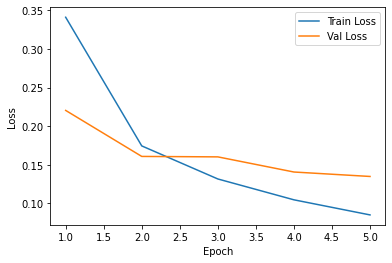

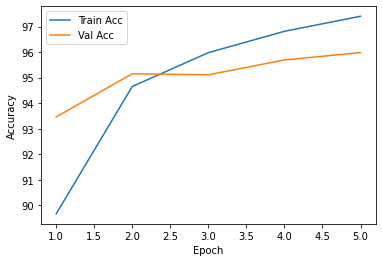

In [195]:
# Training Loop for TanH
# Training Loop for model D
train_loss_data = []
val_loss_data = []
train_acc_data = []
val_acc_data = []
total_step = len(train_loader)
for epoch in range(num_epochs):
    train_loss = 0.0
    train_total = 0
    train_correct = 0
    val_loss = 0.0
    val_total = 0
    val_correct = 0
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model_tanh(images.reshape(-1, 28*28))
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizerE.zero_grad()
        loss.backward()
        optimizerE.step()

        # Track training loss and accuracy
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

        # Print training metrics
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, total_step, loss.item()))
        # Evaluate network on validation set and track metrics
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model_tanh(images.reshape(-1, 28*28))
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

  # Record metrics
    train_loss_data.append(train_loss / len(train_loader))
    val_loss_data.append(val_loss / len(val_loader))
    train_acc_data.append(100 * train_correct / train_total)
    val_acc_data.append(100 * val_correct / val_total)

# Print validation metrics
    print('Epoch [{}/{}], Training Loss: {:.4f}, Validating Loss: {:.4f}, Training Accuracy: {:.2f}%, Validation Accuracy: {:.2f}%'
          .format(epoch+1, num_epochs, train_loss_data[-1], val_loss_data[-1], train_acc_data[-1], val_acc_data[-1]))
# Plot Graph of Train & Validating Loss vs Epoch (together in same plot) for model D
plt.plot(range(1, len(train_loss_data)+1),train_loss_data, label='Training Loss')
plt.plot(range(1, len(val_loss_data)+1),val_loss_data, label='Validating Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()           
# Plot Graph of Train & Validation Accuracyuracy vs Epoch (together in same plot) for model E
plt.plot(range(1, len(train_acc_data)+1),train_acc_data, label='Training Accuracy')
plt.plot(range(1, len(val_acc_data)+1),val_acc_data, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Results on Test Set

Report the Test Set classfication accuracy for the three activation functions (ReLU, LeakyReLU & TanH) and state which activation function gave the best performance on test set

In [201]:
# Define how to calculate Accuracy on Test Set
best_model.eval()
with torch.no_grad():
    # Initialize variables for calculating accuracy
    total = 0
    correct = 0
    # Iterate over the test set
    for images, labels in test_loader:
        # Forward pass
        outputs = best_model(images.reshape(-1,28*28))
        # Calculate loss
        loss = criterion(outputs, labels)
        # Get predicted labels
        _, predicted = torch.max(outputs.data, 1)
        # Update total and correct counts
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    # Calculate accuracy
    accuracy_best_model = 100 * correct / total

# Evaluate model_lrelu
model_lrelu.eval()
with torch.no_grad():
    # Initialize variables for calculating accuracy
    total = 0
    correct = 0
    # Iterate over the test set
    for images, labels in test_loader:
        # Forward pass
        outputs = model_lrelu(images)
        # Calculate loss
        loss = criterion(outputs, labels)
        # Get predicted labels
        _, predicted = torch.max(outputs.data, 1)
        # Update total and correct counts
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    # Calculate accuracy
    accuracy_lrelu = 100 * correct / total

# Evaluate model_tanh
model_tanh.eval()
with torch.no_grad():
    # Initialize variables for calculating accuracy
    total = 0
    correct = 0
    # Iterate over the test set
    for images, labels in test_loader:
        # Forward pass
        outputs = model_tanh(images)
        # Calculate loss
        loss = criterion(outputs, labels)
        # Get predicted labels
        _, predicted = torch.max(outputs.data, 1)
        # Update total and correct counts
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    # Calculate accuracy
    accuracy_tanh = 100 * correct / total

In [202]:
# Accuracy of RELU model
print(accuracy_best_model)

97.19


In [198]:
# Accuracy of TanH model
print(accuracy_lrelu)

96.89


In [199]:
# Accuracy of LeakyReLU model
print(accuracy_tanh)

96.46


Fill in these with the values you obtained from training.

---



* ReLU model Test Set Accuracy: `97.19` %
* TanH model Test Set Accuracy: `96.89` %
* LeakReLU model Test Set Accuracy: `96.46` %